In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_table('train.csv',sep = ',')
df_tst = pd.read_table('test.csv',sep = ',')
data_dict = pd.read_excel('Data_Dictionary.xlsx', sheet_name='history')

In [4]:
data_dict.head()

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature


In [5]:
df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
new1 = pd.read_csv('new_merchant_transactions.csv',sep = ',')


In [7]:
#only keep id from train in new_merchant_transaction
output=pd.merge(new1, df[['card_id','target','first_active_month']], how='inner', left_on='card_id', right_on='card_id')
#output.to_csv("new_transaction_id_train.csv", sep = ',')
output.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target,first_active_month
0,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29,-4.839243,2016-08
1,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16,-4.839243,2016-08
2,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10,-4.839243,2016-08
3,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19,-4.839243,2016-08
4,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37,-4.839243,2016-08


In [8]:
#output=pd.merge(new1, df_tst[['card_id']], how='inner', left_on='card_id', right_on='card_id')
#output.to_csv("new_transaction_id_test.csv", sep = ',')

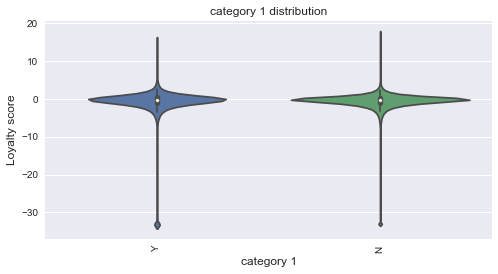

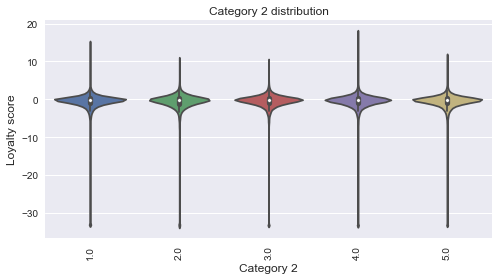

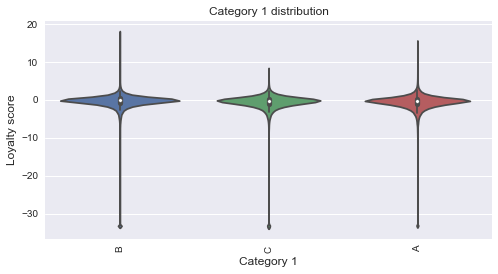

In [9]:
#category 1
plt.figure(figsize=(8,4))
sns.violinplot(x="category_1", y="target", data=output)
plt.xticks(rotation='vertical')
plt.xlabel('category 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("category 1 distribution")
plt.show()
#category 2
plt.figure(figsize=(8,4))
sns.violinplot(x="category_2", y="target", data=output)
plt.xticks(rotation='vertical')
plt.xlabel('Category 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Category 2 distribution")
plt.show()
#category 3
plt.figure(figsize=(8,4))
sns.violinplot(x="category_3", y="target", data=output)
plt.xticks(rotation='vertical')
plt.xlabel('Category 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Category 1 distribution")
plt.show()

In [10]:
# change purchase date to mm/yyyy
output["month"] = output["purchase_date"].str.slice(0, 7)

In [11]:
#create dataframe card_id, month, frequency
freq_month = (output.groupby(['card_id','month']).size().reset_index(name='monthly_count'))
#pd.get_dummies(freq_month['month'])
freq_month = pd.concat([freq_month, pd.get_dummies(freq_month['month'])], axis=1)

{'2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04'}